【問題1】コンペティション内容の把握

Home Creditはどのような企業？

貸付が十分に受けることができないような人たちが、しっかりとローンを組むことができるよう、さまざまなデータを元に取引情報を含む返済能力などの予測を行う、安全で安心のお金の貸し借りの場を作る会社

このコンペティションでは何を予測する？

「SK_ID_CURR」をもとに「target variable」の予測を行う

それを予測することで企業が得られるメリットは何？

返済能力があるにもかかわらず排除されてしまったような潜在的な顧客を開拓できる可能性がある

In [1]:
# 【問題2】データの概観の把握
# 取り込みをしap_dataとする

import pandas as pd
import numpy as np

ap_data=pd.read_csv("/Users/chidayasuhiro/diveintocode-ml/application_train.csv")

ap_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# .head()、.info()、describe()などを使う

ap_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
ap_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [26]:
ap_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [27]:
# 欠損値の有無を見る

ap_data.isnull()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
307507,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
307508,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
307509,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


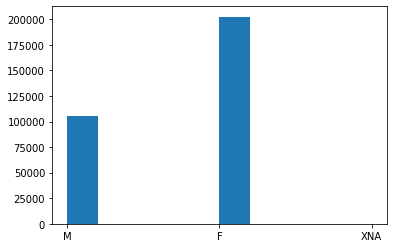

In [3]:
# クラスの割合がわかるグラフを描く
# クラスの割合を示す例としてCODE_GENDERのグラフを作成

import matplotlib.pyplot as plt
target1=ap_data["CODE_GENDER"]
plt.hist(target1)
plt.show()

【問題3】課題設定

データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください

・一部データを可視化しデータの分布のイメージを掴む

・返済能力に大きく関わってきそうな「income type」はどのようなものか

・「income total」がどのようなものか確認

・経済状況を反映しそうな、FLAG_OWN_REALTYのデータから考察を行う

・相関が強そうなものを見つけ出す

【問題4】データ探索

探索で使用する表やグラフを、考察と共に 15個以上 作成

＃１〜＃１５で課題に挑んでいく

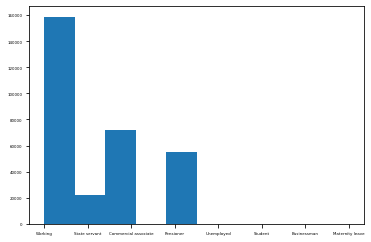

In [92]:
#1　「income type」のグラフ見てみる

data1=ap_data["NAME_INCOME_TYPE"]
plt.tick_params(labelsize = 4)
plt.hist(data1)
plt.show()

＜1の考察＞

多くがwoekingであり、次にCommercial associateとなっている
割合をもう少し視覚的に把握するために円グラフにする

In [91]:
#2　「income type」の割合を見てみる
import collections
collections.Counter(data1)

Counter({'Working': 158774,
         'State servant': 21703,
         'Commercial associate': 71617,
         'Pensioner': 55362,
         'Unemployed': 22,
         'Student': 18,
         'Businessman': 10,
         'Maternity leave': 5})

＜2の考察＞

グラフと合わせて、実際の数値も見ることで、データの分布のイメージができた

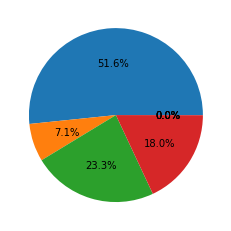

In [93]:
#3　「income type」を円グラフで出してみる

collections.Counter(data1)
list2=[158774,21703,71617,55362,22,18,10,5]

plt.pie(list2,autopct="%1.1f%%")
plt.show()

＜3の考察＞

円グラフにすることで視覚的にわかりやすくなった
woeking、Commercial associate、Pensionerで９割以上になることがわかる

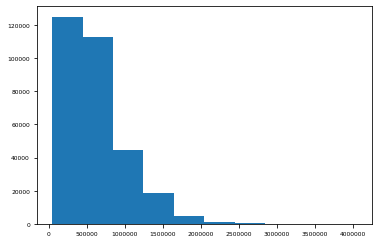

In [94]:
#4　AMT_CREDITをグラフで可視化してイメージをつかむ

data3=ap_data["AMT_CREDIT"]

plt.tick_params(labelsize = 6)
plt.hist(data3)
plt.show()

＜4の考察＞

グラフで可視化することでわかりやすくなった、
AMT_CREDITは０〜２００００００の範囲が大半である

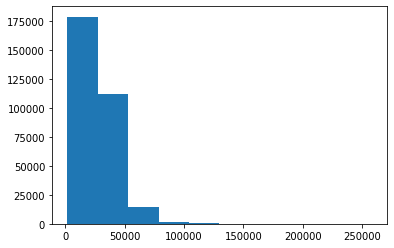

In [95]:
#5　AMT_ANNUITYをグラフで可視化してイメージをつかむ

data4=ap_data["AMT_ANNUITY"]

plt.tick_params(labelsize = 10)
plt.hist(data4)
plt.show()

＜5の考察＞

グラフで可視化することでわかりやすくなった、 AMT_ANNUITYは0〜50000の範囲が大半である

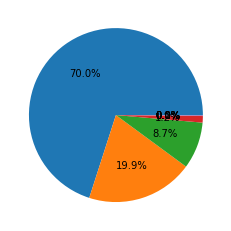

Counter({0: 215371,
         1: 61119,
         2: 26749,
         3: 3717,
         4: 429,
         7: 7,
         5: 84,
         6: 21,
         8: 2,
         9: 2,
         11: 1,
         12: 2,
         10: 2,
         19: 2,
         14: 3})

In [96]:
#6 CNT_CHILDRENをグラフにより可視化

data5=ap_data["CNT_CHILDREN"]
collections.Counter(data5)
data5_1=[215371,61119,26749,3717,429,84,21,7,2,2]
plt.pie(data5_1,autopct="%1.1f%%")
plt.show()

collections.Counter(data5)

＜6の考察＞

円グラフにすることで大まかに把握でき流、半分以上が子供はなしという結果であった

In [97]:
#7 AMT_INCOME_TOTALについて考察１ さまざまな値を確認

data6=ap_data["AMT_INCOME_TOTAL"]

data6.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

＜7の考察＞

AMT_INCOME_TOTALの数値を細かく分析して、概要を把握できた

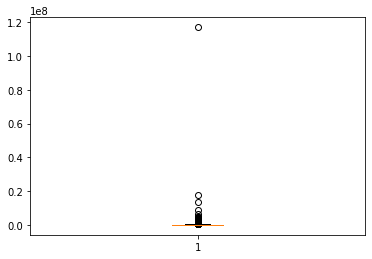

In [98]:
#8 AMT_INCOME_TOTALについて考察２ 箱ひげ図で確認

data7=ap_data["AMT_INCOME_TOTAL"]

plt.boxplot(data7)
plt.show()

＜8の考察＞

箱ひげ図を制作したが、数値の分布からか少しわかりにくいグラフになっており、箱ひげ図での分析はあまり意味を持たない可能性があることがわかった

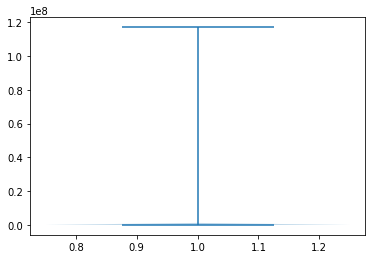

In [99]:
#9 AMT_INCOME_TOTALについて考察３　バイオリン図での確認

data8=ap_data["AMT_INCOME_TOTAL"]

plt.violinplot(data8)
plt.show()

＜9の考察＞

バイオリン図を制作したが、こちらでも箱ひげ図と同様に数値の分布からか少しわかりにくいグラフになっており、意味を捉えにくい。

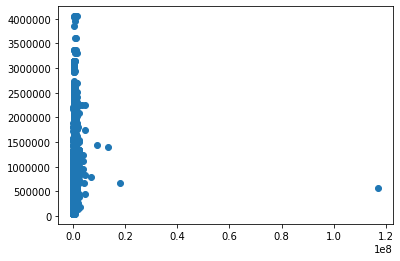

In [100]:
#10 AMT_INCOME_TOTALとAMT_CREDITの散布図を作成し把握

plt.scatter(data8,data3)
plt.show()

＜10の考察＞

プロットを行って、相関関係を調べようとしたところ、
AMT_INCOME_TOTALについて１つとても大きな値があり
そのせいで散布図が１点だけかなり大きな点をとったものができてしまい
相関関係を視覚的に確認するのが少し難しくなってしまった

In [101]:
#11 AMT_INCOME_TOTALとAMT_CREDITの相関係数を計算

np.corrcoef(data8, data3)

array([[1.        , 0.15687027],
       [0.15687027, 1.        ]])

＜11の考察＞

相関係数を調べたところ約-0.15となり、大きな相関は見られなかった

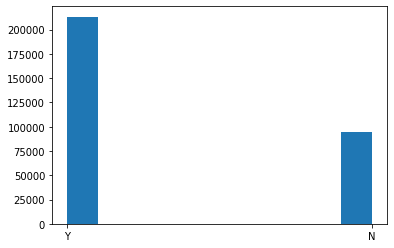

In [102]:
#12 AMT_INCOME_TOTALとAMT_CREDITの相関係数を計算

data11=ap_data["FLAG_OWN_REALTY"]

plt.tick_params(labelsize = 10)
plt.hist(data11)
plt.show()

＜12の考察＞

可視化をすることで割合が把握しやすくなった

In [103]:
#13 AMT_INCOME_TOTALとMT_GOODS_PRICEの相関係数を計算

data12=ap_data["DAYS_BIRTH"]
np.corrcoef(data8, data12)

array([[1.        , 0.02726087],
       [0.02726087, 1.        ]])

＜13の考察＞

AMT_INCOME_TOTALとMT_GOODS_PRICEの相関係数はかなり０に近く、
ほぼ無相関に近いものと考えられる

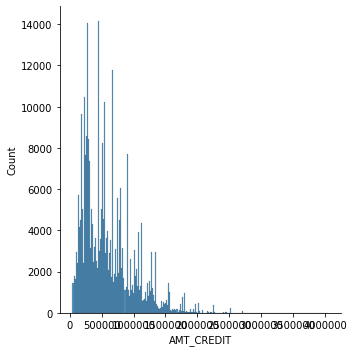

In [104]:
#14　#3でAMT_CREDITをグラフで可視化してイメージを掴んだが、より見やすいものもある可能性もあるので別の方法でグラグ化し比較


data13=ap_data["AMT_CREDIT"]
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(data13)
plt.show()

＜14の考察＞

こちらのグラフであれば、大まかな傾向は少しみにくくはなるものの
詳細のイメージを持つことができるようになった

In [105]:
#15 相関係数行列を作る

ap_data.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,...,0.000509,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,...,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,-0.239818,...,0.004031,0.000864,0.000988,-0.002450,-0.000410,-0.000366,-0.002436,-0.010808,-0.007836,-0.041550
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,-0.064223,...,0.003130,0.002408,0.000242,-0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,-0.055436,-0.066838,...,0.034329,0.021082,0.031023,-0.016148,-0.003906,0.004238,-0.001275,0.054451,0.015925,-0.048448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,-0.002193,0.002704,-0.000366,0.002944,0.004238,0.002185,0.004677,0.001399,0.002255,0.000472,...,0.013281,0.001126,-0.000120,-0.001130,0.230374,1.000000,0.217412,-0.005258,-0.004416,-0.003355
AMT_REQ_CREDIT_BUREAU_WEEK,0.002099,0.000788,-0.002436,0.002387,-0.001275,0.013881,-0.001007,-0.002149,-0.001336,0.003072,...,-0.004640,-0.001275,-0.001770,0.000081,0.004706,0.217412,1.000000,-0.014096,-0.015115,0.018917
AMT_REQ_CREDIT_BUREAU_MON,0.000485,-0.012462,-0.010808,0.024700,0.054451,0.039148,0.056422,0.078607,0.001372,-0.034457,...,-0.001565,-0.002729,0.001285,-0.003612,-0.000018,-0.005258,-0.014096,1.000000,-0.007789,-0.004975
AMT_REQ_CREDIT_BUREAU_QRT,0.001025,-0.002022,-0.007836,0.004859,0.015925,0.010124,0.016432,-0.001279,-0.011799,0.015345,...,-0.005125,-0.001575,-0.001010,-0.002004,-0.002716,-0.004416,-0.015115,-0.007789,1.000000,0.076208


＜15の考察＞

相関係数行列を作ることで数値一度に把握することができるようになったが、
項目が多いので大まかにしか把握できない。
次に相関係数行列のヒートマップも作成する。

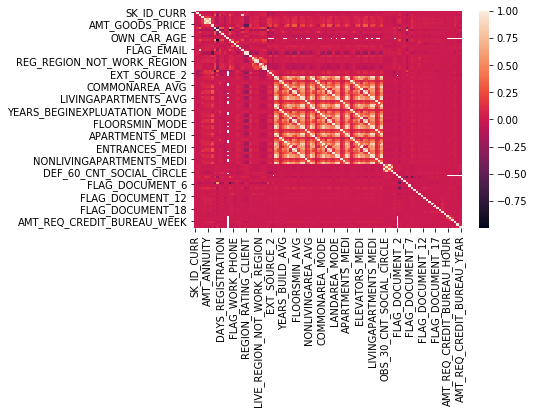

In [106]:
#16 相関係数行列を作る

sns.heatmap(ap_data.corr())

＜16の考察＞

ヒートマップにすることで、相関があるものが浮き彫りになった。
別で自分が計算したものは相関が弱いものが多かったが、ヒートマップによりある程度把握することができる。
特にグラフ（結果的にはラベルの並びの）の真ん中あたりの変数が、強い相関を持っている可能性が高いことがわかる。

【問題5】（アドバンス課題）Notebooksへの投稿

別途、投稿作業を進める